In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# text analysis
text = """Discussing climate, sustainability, and preserving the natural world with President @EmmanuelMacron today in Paris. #BezosEarthFund #ClimatePledge"""

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

remove_link = re.sub(f'https?:\/\/.*[\r\n]*', '', text)
remove_link = re.sub(r'#', '', remove_link)
print(remove_link)

Discussing climate, sustainability, and preserving the natural world with President @EmmanuelMacron today in Paris. BezosEarthFund ClimatePledge


In [ ]:
print('\033[92m' + text)
print('\033[92m' + remove_link)

Discussing climate, sustainability, and preserving the natural world with President @EmmanuelMacron today in Paris. #BezosEarthFund #ClimatePledge
Discussing climate, sustainability, and preserving the natural world with President @EmmanuelMacron today in Paris. BezosEarthFund ClimatePledge


In [ ]:
from nltk.tokenize import sent_tokenize

text = """Hello Mr. steve, how you doing? whats up? The weather is great, and city is awesome. how you doing? The sky is pinkish-blue. 
You shouldn't eat cardboard, how you doing?"""
nltk.download('punkt')
tokenized_text = sent_tokenize(text)
print(tokenized_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['Hello Mr. steve, how you doing?', 'whats up?', 'The weather is great, and city is awesome.', 'how you doing?', 'The sky is pinkish-blue.', "You shouldn't eat cardboard, how you doing?"]


In [ ]:
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(text)

print(tokenized_word)

['Hello', 'Mr.', 'steve', ',', 'how', 'you', 'doing', '?', 'whats', 'up', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'how', 'you', 'doing', '?', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', ',', 'how', 'you', 'doing', '?']


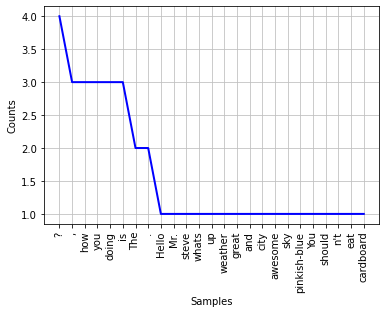

In [ ]:
# frequency distribution
from nltk.probability import FreqDist
fredist = FreqDist(tokenized_word)
fredist.most_common(4)

#plotting frequency distribution
import matplotlib.pyplot as plt
fredist.plot(30, cumulative = False, color = 'blue')
plt.show()

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'was', "needn't", 'only', 'before', 'be', 'off', 'm', 'your', "it's", 'we', 'am', 'them', 'what', 'itself', 'into', 'himself', 'been', "isn't", 'being', 'while', 'haven', 'my', 'were', 'does', 'if', 'or', 'with', 'now', 'wasn', "aren't", 'don', 'and', 'these', 'against', 'i', 'those', 'can', 'should', 'ma', 'him', 'out', "didn't", 'who', 're', 'he', 'ours', 'from', 'it', 'hers', 'myself', 'had', 'their', 'about', "mightn't", 'herself', 'of', 'isn', 'than', 'hadn', 'theirs', 'has', 'for', 'is', 'our', "don't", 'shouldn', 'weren', 'd', "she's", 't', 'through', "shan't", 'how', 'doing', 'y', 'by', 'over', 'mightn', 'all', 'will', 'some', 'when', 'hasn', 'have', 'after', "should've", 'a', 'to', 'yours', "you're", 'mustn', 'few', 'just', 'wouldn', 'its', 'once', 'again', 'couldn', 'as', 'that', "shouldn't", 've', 'at', 'here', 'on', 'are', 'her', "weren't", 'ain', 'between', 'down

In [ ]:
filtered_sentence = []
for word in tokenized_word:
  if word not in stop_words:
    filtered_sentence.append(word)
print('Tokenized Sentence : \n', tokenized_word)
print('\nFiltered Sentence : \n', filtered_sentence)

Tokenized Sentence : 
 ['Hello', 'Mr.', 'steve', ',', 'how', 'you', 'doing', '?', 'whats', 'up', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'how', 'you', 'doing', '?', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', ',', 'how', 'you', 'doing', '?']

Filtered Sentence : 
 ['Hello', 'Mr.', 'steve', ',', '?', 'whats', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', '?', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard', ',', '?']


In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
stemmed_sentence = []
for word in filtered_sentence:
  stemmed_sentence.append(ps.stem(word))

print('Filtered Sentence : \n', filtered_sentence)
print('\nStemmed Sentence : \n', stemmed_sentence)

Filtered Sentence : 
 ['Hello', 'Mr.', 'steve', ',', '?', 'whats', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', '?', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard', ',', '?']

Stemmed Sentence : 
 ['hello', 'mr.', 'steve', ',', '?', 'what', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', '?', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard', ',', '?']


In [ ]:
# stemming and lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

ps = PorterStemmer()
word = 'crying'
print('Lemmatized Word  :  ', lemmatizer.lemmatize(word, 'v'))
print('Stemmed word  :  ', ps.stem(word))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Lemmatized Word  :   cry
Stemmed word  :   cri
